In [32]:
#biblioteki
from scipy.optimize import dual_annealing
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [33]:
#funkcje
func = lambda x: np.sum(x*x - 10*np.cos(2*np.pi*x)) + 10*np.size(x)  # tu wpisać należy funkcję, zaimplementowano tu funkcję Rastrigina

def infinite_sequence():
    num = 0
    while True:
        yield num
        num += 1
        
gen = infinite_sequence()

def sol_spy(inputs,y,cont):
    global sol_df
    iter_no=next(gen)
    sol_df.iloc[iter_no,:]=[y]+inputs.tolist()+[cont]
    
    # ta funkcja przechwytuje i osadza zmienne wejścia-wyjścia oraz informację o kontekście. Kontekst może wynosić 0/1/2.
    #0 oznacza,że minimum znaleziono podczas wyżarzania, 1 że podczas lokalnych przesukiwań, 2 że podczas podwójnego wyżarzania (szybkiego i klasycznego)
    
    # link do dokumentacji: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html#scipy.optimize.dual_annealing
    #print(iter_no,inputs,y,cont)

def write(frame, name):
    w=pd.ExcelWriter(name+'.xlsx')
    frame.to_excel(w)
    w.close()

# Uwaga na wyłączone seed_num poniżej !!!!

In [47]:
###cała reszta

############## parametry 
func_name='Rastrigin'
#seed_num=5
dim=10 #wymiar - ile zmiennych wejścia
lw = -5.12 #min wartość dla zmiennych wejścia 
up = 5.12 #max. wartość dla zmiennych wejścia
no_iter=1000 # liczba iteracji, domyślnie bez podania 1000
start_temp= 5320  #temperatura startowa wyżarzania, Default= 5230. Zakres (0.01, 5.e4].
rest_ratio= 0.0001 #liczba z zkaresu (0,1), temperatura spada kiedy temp osiąga wart. = temp startu*wsp.restartu
vis=2.5 #wart. domyśłna, przedział (0,3]. Im wyższy parametry tym większy skok algorytmu w przestrzeni rozwiązań
acc=-5 #wsp. rozkładu akceptacji. Default = -5.0 , zakres (-1e4, -5]. Im parametr niższy tym mniejsze prawdopodobieństwo akceptacji
max_tries=1e7 #wartość domyślna, jeśli algorytm jest w trakcie lokalnego przeszukiwania i zostanie przekroczony ten limit wywołań funkcji celu, algorytm zakończy się po przeszukiwaniu lokalnym.
stupid_big_number=-1000

#np.random.seed(seed_num)  # ustalenie seeda dla powtarzalności parametrów
low_bounds=[lw]*dim #kresy dolne ograniczeń zmiennych wejśćia, w tym przypadku zwraca wektor 10-elem. z których każda zmienna ma ograniczenie dolne =-5.12
up_bounds=[up]*dim #kresy górne ograniczeń zmiennych wejśćia, w tym przypadku zwraca wektor 10-elem. z których każda zmienna ma ograniczenie górne = 5.12

start_array=np.random.uniform(low=lw,high=up,size=(dim,)) #startowe wartości zmiennych wejścia, opcjonalne w funkcji ret, tu zmienne podawane losowo z rozkładu jednostajnego 

# start_array=[0]*dim   #można odznaczyć i zobaczyć co się stanie dla danej funkcji, dla Rastrigina jest to podanie prawdziwego rozwiązania jako pierszego "strzału", czyli lepiej nie będzie
                        #co ważne, wymiarowość to n kolumn na 1 wiersz, gdzie n to liczba zmiennych

############# koniec parametrów    


#####ramka na dane
sol_df=pd.DataFrame(data=stupid_big_number*np.ones(shape=(no_iter,dim+2)),columns=['y']+['x'+str(x) for x in range(dim)]+['context'])
#####



######rozwiązanie
solution = dual_annealing(func, bounds=list(zip(low_bounds, up_bounds)), maxiter=no_iter, x0=start_array,initial_temp=start_temp,
                          restart_temp_ratio=rest_ratio,visit=vis,accept=acc,maxfun=max_tries, callback=sol_spy) 

#sol_df=sol_df.iloc[:next(gen),:]
sol_df=sol_df.drop(sol_df[sol_df.y==stupid_big_number].index).reset_index(drop=True)

print('It lives ! And they called me a madman!\n')
print('Muaha-ha-ha-ha!\n\n')

print('Real_max_iter=',len(sol_df),'\n') #w ile iteracji znaleziono rozwiązanie
print('y=',solution.fun,'\n')
print('x_xum,val = ', list(enumerate([format(y,'.3E') for y in solution.x])))

write(sol_df,'SA_%s_%d_%d_%d_%f_%f_%f'% (func_name,dim,no_iter,seed_num,start_temp,rest_ratio,vis))


It lives ! And they called me a madman!

Muaha-ha-ha-ha!


Real_max_iter= 24 

y= 2.842170943040401e-14 

x_xum,val =  [(0, '-1.838E-09'), (1, '-3.057E-09'), (2, '-3.524E-09'), (3, '-4.223E-09'), (4, '-5.765E-09'), (5, '-3.334E-09'), (6, '-4.330E-09'), (7, '-3.900E-09'), (8, '-4.395E-09'), (9, '-5.135E-09')]


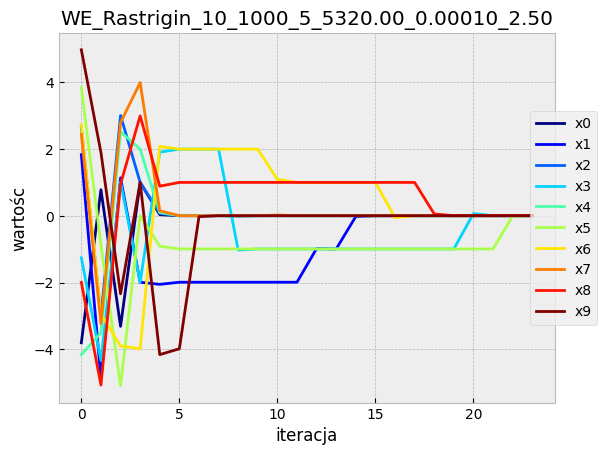

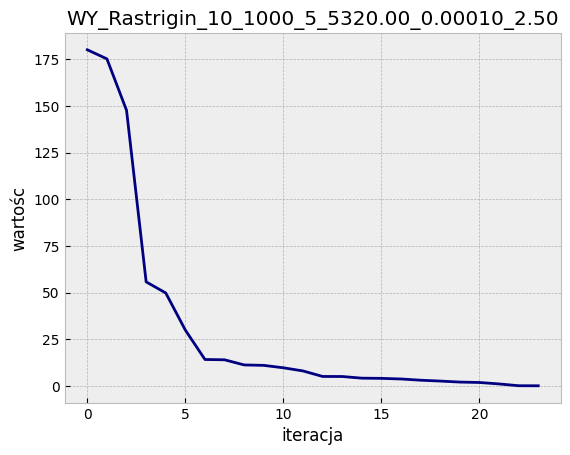

In [53]:


plt.style.use('bmh')
#fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
fig = plt.figure()
axes = [plt.gca()]

ax1=sol_df.loc[:,['x'+str(y) for y in range(dim)]].plot(ax=axes[0],lw=2, colormap='jet', title='WE_%s_%d_%d_%d_%.2f_%.5f_%.2f'% (func_name,dim,no_iter,seed_num,start_temp,rest_ratio,vis))
ax1.set_xlabel("iteracja")
ax1.set_ylabel("wartośc")
ax1.grid('on', which='both', axis='both',  linestyle='--' )
ax1.legend(loc='right',bbox_to_anchor=(1.1, 0.5))
fig.savefig('SA_%s_%d_%d_%d'% (func_name,dim,no_iter,seed_num))

fig2 = plt.figure()
axes = [0, plt.gca()]

ax2=sol_df['y'].plot(ax=axes[1],lw=2, colormap='jet', title='WY_%s_%d_%d_%d_%.2f_%.5f_%.2f'% (func_name,dim,no_iter,seed_num,start_temp,rest_ratio,vis))
ax2.set_xlabel("iteracja")
ax2.set_ylabel("wartośc")
ax2.grid('on', which='both', axis='both',  linestyle='--' )
fig2.savefig('SA2_%s_%d_%d_%d'% (func_name,dim,no_iter,seed_num))
